* **Name: Ben Nguyen**
* **Partner Name: Priya** 
* **Group Block ID: 530330092001**
* **Date: 12/08/2024**
* **Dataset: Last**

# Milestone 1

In [141]:
# Import tool to manipulate tabular data
import pandas as pd

In [142]:
# Importing graffiti data and canvas data
graffiti = pd.read_csv("/home/jovyan/Data/last_graffiti.csv")
canvas = pd.read_csv("/home/jovyan/Data/last_canvas.csv")

In [143]:
graffiti.columns

Index(['id', 'canvas_id', 'created_at', 'uploaded_at', 'created_by', 'title',
       'num', 'date_recorded', 'width', 'height', 'type', 'technique',
       'marker_type', 'nip_type', 'other', 'num_colors', 'colors',
       'nature_graffiti', 'transcribable', 'message', 'transcription',
       'notes'],
      dtype='object')

In [144]:
canvas.columns

Index(['id', 'created_at', 'uploaded_at', 'created_by', 'title', 'at_canvas',
       'coords', 'date_entry_canvas', 'property_type', 'property_use',
       'surveillance_status', 'surveillance', 'canvas_location',
       'canvas_nature', 'surface_material', 'graffiti_removal',
       'viewing_potential', 'accessibility', 'notes'],
      dtype='object')

In [145]:
# Creating tables for our block graffiti data
my_graf = graffiti[(graffiti['created_by'] == 'dkhn@uw.edu') | (graffiti['created_by'] == 'priyad4@uw.edu')].copy()
my_can = canvas[(canvas['created_by'] == 'dkhn@uw.edu') | (canvas['created_by'] == 'priyad4@uw.edu')].copy()
# Creating tables for other blocks graffiti data
res_graf = graffiti[(graffiti['created_by'] != 'dkhn@uw.edu') & (graffiti['created_by'] != 'priyad4@uw.edu')].copy()
res_can = canvas[(canvas['created_by'] != 'dkhn@uw.edu') & (canvas['created_by'] != 'priyad4@uw.edu')].copy()
# Merge canvas and graffiti data tables
all_combination = pd.merge(canvas, graffiti, left_on = ['id', 'created_by'], right_on = ['canvas_id', 'created_by'], how = 'inner', suffixes=('_c', '_g'))
combination = pd.merge(my_can, my_graf, left_on = ['id', 'created_by'], right_on = ['canvas_id', 'created_by'], how = 'inner', suffixes=('_c', '_g'))
res_combination = pd.merge(res_can, res_graf, left_on = ['id', 'created_by'], right_on = ['canvas_id', 'created_by'], how = 'inner', suffixes=('_c', '_g'))
combined = combination.copy() # Backup table for a different analysis
res_combined = res_combination.copy() # Backup table for a different analysis

In [146]:
combination.columns

Index(['id_c', 'created_at_c', 'uploaded_at_c', 'created_by', 'title_c',
       'at_canvas', 'coords', 'date_entry_canvas', 'property_type',
       'property_use', 'surveillance_status', 'surveillance',
       'canvas_location', 'canvas_nature', 'surface_material',
       'graffiti_removal', 'viewing_potential', 'accessibility', 'notes_c',
       'id_g', 'canvas_id', 'created_at_g', 'uploaded_at_g', 'title_g', 'num',
       'date_recorded', 'width', 'height', 'type', 'technique', 'marker_type',
       'nip_type', 'other', 'num_colors', 'colors', 'nature_graffiti',
       'transcribable', 'message', 'transcription', 'notes_g'],
      dtype='object')

### How do graffiti locations distribute across property types?

In [147]:
# My block
# Creating a table showing numbers of property type of canvases and their locations 
pd.crosstab(combination['canvas_location'], combination['property_type'])

property_type,comercial,government,public,residential
canvas_location,,,,
alley,22,0,6,5
other,2,0,8,0
overpass,0,0,4,0
street,37,36,59,7


***The majority of graffiti are distributed on streets, with a few being in alleys. Supprizingly, given only a few graffiti being on residential property, more than half of them are located in alleys. This suggests that writers have equal preference whether the canvas located in alleys or on streets when writing on residential properties.***

In [148]:
# Other blocks
# Creating a table showing numbers of property type of canvases and their locations 
res_cross = pd.crosstab(res_combination['canvas_location'], res_combination['property_type'])
res_cross.loc[:, 'Total'] = res_cross.sum(axis=1) # Add a column for total graffiti in each location
res_cross

property_type,comercial,government,industrial,other,public,residential,terrain_vague,Total
canvas_location,,,,,,,,
alley,76,40,47,0,66,25,0,254
bridge,0,56,20,0,22,0,0,98
highway,36,6,34,0,109,0,0,185
indoors,0,0,0,5,19,0,4,28
other,42,22,7,21,293,5,0,390
overpass,0,1,21,0,53,0,0,75
railroad_tracks,10,37,77,0,7,0,0,131
roof,2,0,0,0,3,0,0,5
street,267,312,116,13,614,102,2,1426


***Most of the activity happens on streets, mainly on public, government, and commercial properties. Other areas and highways also have a lot of activity. Places like roofs and indoors are less targeted. Public properties are the most common overall, especially on streets. Residential and less accessible areas, like terrain vague, have the least activity.***

### How do canvas locations distribute across property types?

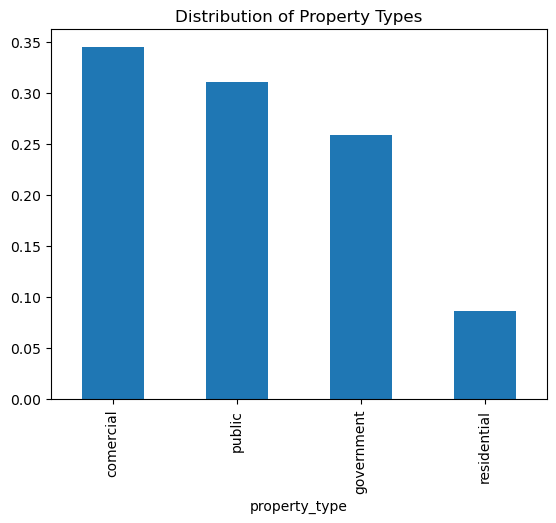

In [149]:
# My block
# Creating a bar chart
my_can['property_type'].value_counts(normalize = True).plot.bar(title = 'Distribution of Property Types');

**Most canvases are comercial properties, closely followed by public, and then government properties. Residential property is least likely to be used as canvas.**

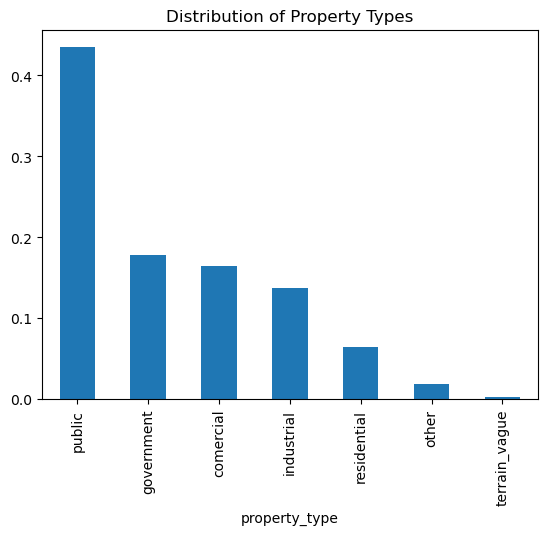

In [150]:
# Other blocks
# Creating a bar chart
res_can['property_type'].value_counts(normalize = True).plot.bar(title = 'Distribution of Property Types');

**Majority of canvases are of public properties. Government, comercial, and industrial property type are similar. Residential is similar to our block group, less likely to be target, compare to other types. Other and terrain vague property types take up only a small percent of canvases.**

In [151]:
my_can.columns

Index(['id', 'created_at', 'uploaded_at', 'created_by', 'title', 'at_canvas',
       'coords', 'date_entry_canvas', 'property_type', 'property_use',
       'surveillance_status', 'surveillance', 'canvas_location',
       'canvas_nature', 'surface_material', 'graffiti_removal',
       'viewing_potential', 'accessibility', 'notes'],
      dtype='object')

### How strong is the evidence of graffiti removal?

In [152]:
# My block
# Counting graffiti evidence at each canvas
my_can['graffiti_removal'].value_counts()

graffiti_removal
N          39
Y          14
unclear     5
Name: count, dtype: int64

**More than a third of the graffiti has sign of buffing. From my experience talking to a real estate manager at our block group, graffiti on commercial properties are regularly buffed, even on a non public facing alley. Since a big part of our canvases are on comercial property, this number is relatively high.**

### Are graffiti locations very visible to the public?

In [153]:
combination.columns

Index(['id_c', 'created_at_c', 'uploaded_at_c', 'created_by', 'title_c',
       'at_canvas', 'coords', 'date_entry_canvas', 'property_type',
       'property_use', 'surveillance_status', 'surveillance',
       'canvas_location', 'canvas_nature', 'surface_material',
       'graffiti_removal', 'viewing_potential', 'accessibility', 'notes_c',
       'id_g', 'canvas_id', 'created_at_g', 'uploaded_at_g', 'title_g', 'num',
       'date_recorded', 'width', 'height', 'type', 'technique', 'marker_type',
       'nip_type', 'other', 'num_colors', 'colors', 'nature_graffiti',
       'transcribable', 'message', 'transcription', 'notes_g'],
      dtype='object')

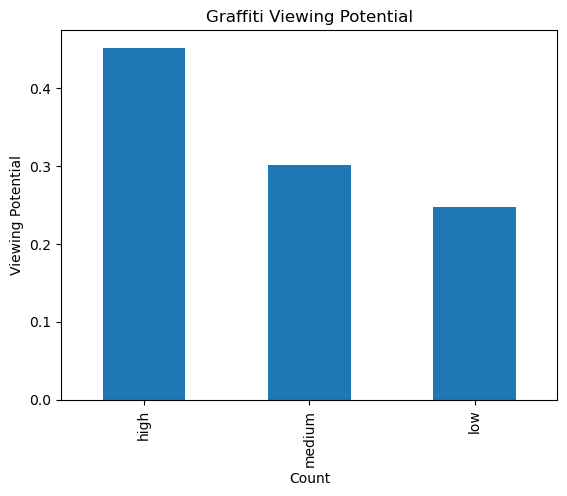

In [154]:
# My blocks
# Creating a bar chart showing count of viewing potential of canvases
combination['viewing_potential'].value_counts(normalize = True).plot.bar(title = "Graffiti Viewing Potential", xlabel = 'Count', ylabel = 'Viewing Potential');

**Yes, graffiti at our location is quite visible. Note that a good amount of challenging to reach graffiti are excluded from the data collection, and they tend to have a medium to low visibility.**

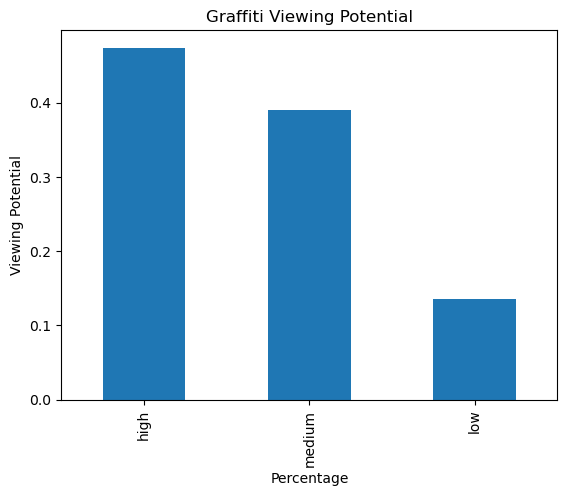

In [155]:
# Other blocks
# Creating a bar chart showing count of viewing potential of canvases
res_combination['viewing_potential'].value_counts(normalize = True).plot.bar(title = "Graffiti Viewing Potential", xlabel = 'Percentage', ylabel = 'Viewing Potential');

**Similar story to our block group but with significantly less low viewing potential graffiti.**

### Is graffiti oportunistic or not?

In [156]:
my_can['surveillance'].values

array(['[]', "['people', 'lights']", "['dogs', 'guards', 'people']",
       "['people', 'dogs']", '[]', "['people', 'lights']",
       "['people', 'alarms', 'guards', 'dogs', 'lights', 'cameras']",
       "['people', 'lights']",
       "['cameras', 'guards', 'people', 'dogs', 'lights']",
       "['people', 'lights']",
       "['guards', 'people', 'lights', 'cameras']",
       "['cameras', 'lights', 'dogs', 'people']",
       "['cameras', 'people', 'lights', 'dogs']",
       "['people', 'lights', 'cameras']",
       "['cameras', 'lights', 'dogs', 'guards', 'people', 'alarms']",
       "['cameras', 'people', 'lights']",
       "['cameras', 'lights', 'guards', 'alarms', 'people']",
       "['lights', 'people', 'cameras']",
       "['cameras', 'people', 'lights']", '[]',
       "['cameras', 'people', 'lights']", '[]',
       "['people', 'cameras', 'lights']",
       "['cameras', 'dogs', 'people', 'lights']",
       "['cameras', 'lights', 'dogs', 'people']",
       "['people', 'cameras', 'l

In [157]:
# Import a tool to transform data
from ast import literal_eval
my_can.loc[:, 'surveillance'] = my_can.loc[:, 'surveillance'].apply(literal_eval)

In [158]:
def count_surveillance(df):
    '''returning the count of a list'''
    return len(df)

In [159]:
# Apply the imported tool to transform our data from a string to a list
my_can['opportunistic'] = my_can['surveillance'].apply(count_surveillance) # Find the total number of surveillance for each observation
my_can.head(5)

,id,created_at,uploaded_at,created_by,title,at_canvas,coords,date_entry_canvas,property_type,property_use,surveillance_status,surveillance,canvas_location,canvas_nature,surface_material,graffiti_removal,viewing_potential,accessibility,notes,opportunistic
22,26,2024-11-24 14:32:25-08:00,2024-11-24 14:38:15-08:00,dkhn@uw.edu,11/24/2024 Other,Y,"{'latitude': 47.598551, 'longitude': -122.3257...",11/24/2024,public,in_use,N,[],other,other,['metal'],N,low,['street_Level'],Positioning experts but also a lot of beef,0
23,27,2024-11-24 14:30:25-08:00,2024-11-24 14:32:05-08:00,priyad4@uw.edu,11/24/2024 Other,Y,"{'latitude': 47.598623, 'longitude': -122.3256...",11/24/2024,public,in_use,Y,"[people, lights]",other,other,['metal'],N,medium,['street_Level'],A ping pong table,2
24,28,2024-11-24 14:21:37-08:00,2024-11-24 14:37:58-08:00,dkhn@uw.edu,11/24/2024 Other,Y,"{'latitude': 47.598429, 'longitude': -122.3257...",11/24/2024,public,in_use,Y,"[dogs, guards, people]",alley,other,['metal'],N,low,['street_Level'],Metal table in park,3
25,29,2024-11-24 14:09:40-08:00,2024-11-24 14:15:31-08:00,dkhn@uw.edu,11/24/2024 Other,Y,"{'latitude': 47.598524, 'longitude': -122.3257...",11/24/2024,public,in_use,Y,"[people, dogs]",other,other,"['plastic/vinyl', 'metal']",Y,low,['street_Level'],In a park,2
26,30,2024-11-24 14:05:48-08:00,2024-11-24 14:15:27-08:00,dkhn@uw.edu,11/24/2024 Wall,Y,"{'latitude': 47.598718, 'longitude': -122.3256...",11/24/2024,comercial,in_use,N,[],other,wall,"['wood', 'metal']",Y,low,['street_Level'],Written over two different surfaces,0


In [160]:
# My block
# Make it from 0 to 1
my_can['opportunistic'].value_counts(normalize = True)

opportunistic
3    0.362069
4    0.241379
2    0.206897
0    0.103448
6    0.034483
5    0.034483
1    0.017241
Name: proportion, dtype: float64

**From the number, I would say it is moderately difficult to do graffiti. However, from my experience with the area, I would say the actual opportunistic is higher. People there worry about their own thing, like in New York City, so unless there's guard and camera, I don't think writers will be refrained by the other surveillance.**

In [161]:
# Other blocks
# Apply the imported tool to transform our data from a string to a list
res_can.loc[:, 'surveillance'] = res_can.loc[:, 'surveillance'].apply(literal_eval)
# Find the total number of surveillance for each observation
res_can['opportunistic'] = res_can['surveillance'].apply(count_surveillance)
# Make it from 0 to 1
res_can['opportunistic'].value_counts(normalize = True)

opportunistic
0    0.396914
2    0.208976
1    0.192146
3    0.145863
4    0.044881
5    0.009818
6    0.001403
Name: proportion, dtype: float64

**Compare to our block, writers have an easier time doing graffiti.**

### What is the distribution of graffiti types across your block group?

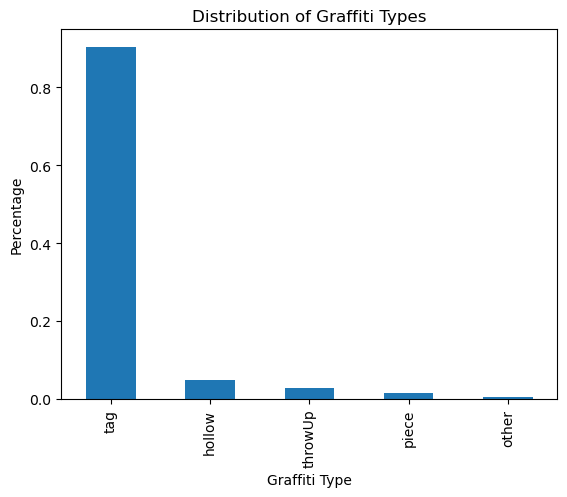

In [162]:
# My block
# Creating a bar chart showing the distribution of graffiti types
my_graf.type.value_counts(normalize = True).plot.bar(title ='Distribution of Graffiti Types', xlabel = 'Graffiti Type', ylabel = 'Percentage');

***Our group encounter a lot of tags, and few of other types. However, I should mention that since tags tend to bundle together, it is faster to fill up our weekly quota, and plus its already abundancy, making the collection a little bit bias.***

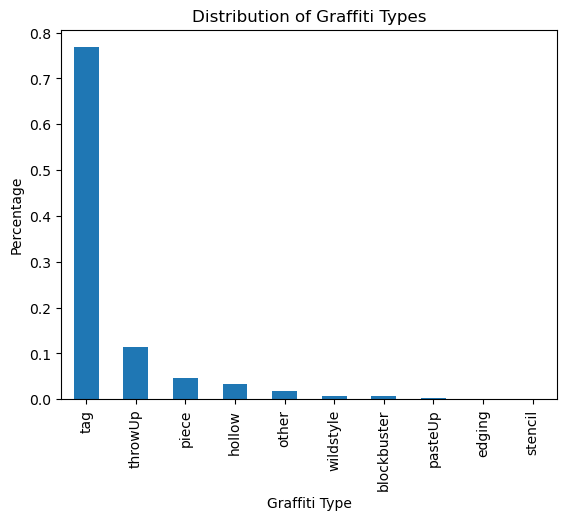

In [163]:
# Other blocks
# Creating a bar chart showing the distribution of graffiti types
res_graf.type.value_counts(normalize = True).plot.bar(title ='Distribution of Graffiti Types', xlabel = 'Graffiti Type', ylabel = 'Percentage');

***Similar trend to our block.***

### With regards to the nature of the message how do these distribute percentagewise?

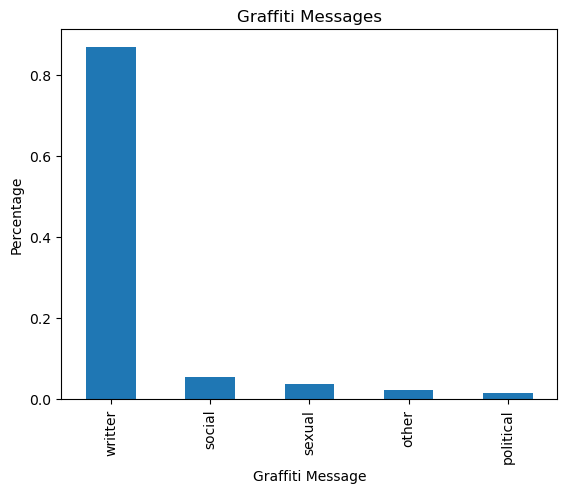

In [164]:
# My block
# Creating a bar chart showing the percentage distribution of graffiti messages
my_graf.message.value_counts(normalize = True).plot.bar(title = 'Graffiti Messages', xlabel = 'Graffiti Message', ylabel = 'Percentage');

**Most of them being for writers. Other types are roughly evenly distributed.**

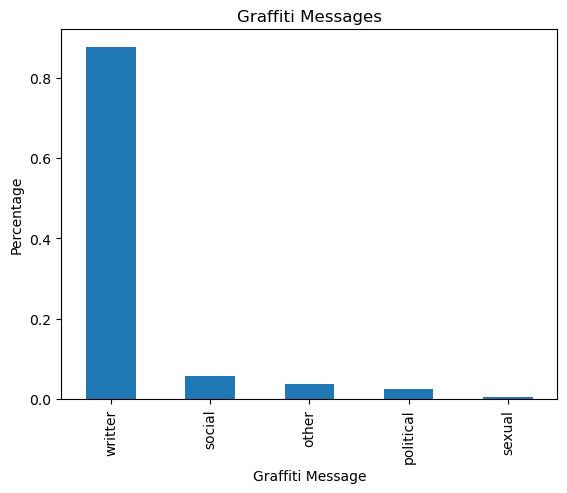

In [165]:
# Other blocks
# Creating a bar chart showing the percentage distribution of graffiti messages
res_graf.message.value_counts(normalize = True).plot.bar(title = 'Graffiti Messages', xlabel = 'Graffiti Message', ylabel = 'Percentage');

**Similar to our block.**

### What are the most common techniques used?

In [166]:
# My block
# Counting techniques
my_graf.technique.value_counts()

technique
marker    120
spray      49
brush      13
other       4
Name: count, dtype: int64

**Markers are the most commonly used tool, making up the majority of the total. Spray is the second most used, followed by brush. Tools categorized as other are the least common.**

In [167]:
# Other blocks
# Counting techniques
res_graf.technique.value_counts()

technique
marker      1844
spray       1694
brush         54
other         43
roller        27
incision      17
Name: count, dtype: int64

**Markers and spray are the most commonly used tools, making up the vast majority of the total. Brush, other tools, rollers, and incisions are far less common in comparison.**

### Is black the most prevalent color in your block group? What about other colors?

In [168]:
# Transform data type from string to list
my_graf.loc[:, 'colors'] = my_graf.loc[:, 'colors'].apply(literal_eval)

In [169]:
# My block
# Create a row for each item in the transformed list
my_graf.colors.explode().value_counts()

colors
black     72
white     54
pink      16
red       15
blue      13
silver    12
yellow    10
violet     7
green      6
orange     5
cyan       2
Name: count, dtype: int64

**Yes**

In [170]:
# Transform data type from string to list
res_graf.loc[:, 'colors'] = res_graf.loc[:, 'colors'].apply(literal_eval)
# Create a row for each item in the transformed list
res_graf.colors.explode().value_counts()

colors
black     1570
white     1563
blue       358
red        320
yellow     227
green      220
silver     219
pink       186
violet     163
orange     117
cyan       102
gold        68
Name: count, dtype: int64

**Yes**

# Milestone 2

### 1. Produce bar charts for the following canvas columns: Viewing Potential and Accessibility

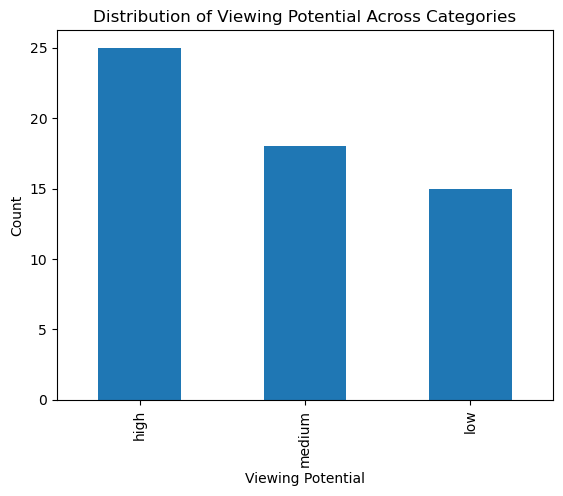

In [171]:
# My block
# Create a bar chart showing the Distribution of Viewing Potential Across Categories
my_can.viewing_potential.value_counts().plot.bar(title = 'Distribution of Viewing Potential Across Categories', xlabel = 'Viewing Potential', ylabel = 'Count');

**The majority of canvases have a high viewing potential, followed by a moderate amount with medium viewing potential. The smallest group is canvases with low viewing potential.**

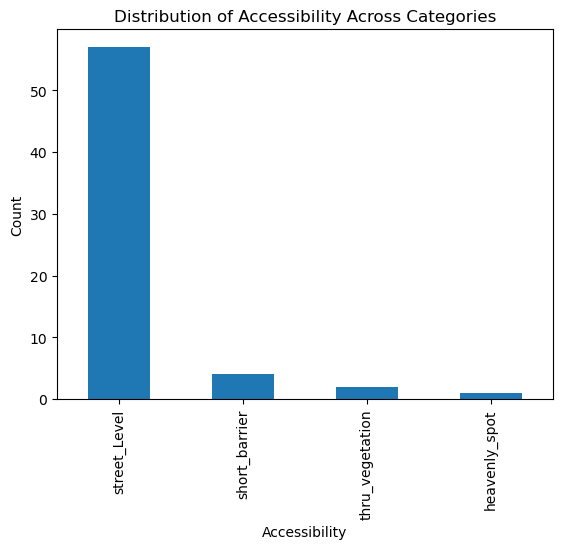

In [172]:
# My block
# Create a bar chart showing Distribution of Accessibility Across Categories
(my_can.accessibility
       .apply(literal_eval)
       .explode()
       .value_counts()
       .plot.bar(title = 'Distribution of Accessibility Across Categories', xlabel = 'Accessibility', ylabel = 'Count')
);

**Majority of canvases are located on street level while the rest are roughly evenly distributed onto short barrier, thru vegetation, and heveanly spots.**

### 2. Produce summary tables 

#### Property Type x Surveillance

In [173]:
# Transform table to create a summary table
my_can_sur_exp = my_can.explode(column = ['surveillance'])
my_can_sur_exp = my_can_sur_exp.reset_index(drop = True)

In [174]:
# Table summarizing number of surveillance of each property type
summary1 = pd.crosstab(my_can_sur_exp['property_type'], my_can_sur_exp['surveillance'])
summary1

surveillance,alarms,cameras,dogs,guards,lights,people
property_type,,,,,,
comercial,0,14,0,7,16,17
government,2,13,5,4,14,14
public,1,8,6,3,14,16
residential,0,4,0,0,3,5


***Our block is a very complicated area, so I want to get a general understanding of how each property type will be surrounded by what kind of surveillance. Commercial and government properties rely heavily on cameras, guards, and lights, suggesting a higher level of security so the graffiti might be less intricate. Residential properties have the least security, with minimal use of guards and lights.***

#### Canvas Location x Accessibility

In [175]:
# Transform data from string to list
my_can['accessibility'] = my_can.loc[:, 'accessibility'].apply(literal_eval)

In [176]:
# Transform data for summary table
my_can_acc_exp = my_can.explode(column = ['accessibility'])
my_can_acc_exp = my_can_acc_exp.reset_index(drop = True)

In [177]:
# Table summarizing number of canvas accessibility at each canvas location
summary2 = pd.crosstab(my_can_acc_exp['canvas_location'], my_can_acc_exp['accessibility'])
summary2

accessibility,heavenly_spot,short_barrier,street_Level,thru_vegetation
canvas_location,,,,
alley,1,0,7,0
other,0,0,5,0
overpass,0,0,2,0
street,0,4,43,2


***Street level canvases are the most accessible, while thru_vegetation provides less accessibility. Canvases in alleys are somewhat accessible, but other locations like overpass and other show very few accessible canvases, especially have no heavenly spot or short barrier in these areas.***

#### Viewing Potential x Accessibility

In [178]:
# Table summarizing the number of accessibility of canvases of their viewing potential
summary3 = pd.crosstab(my_can_acc_exp['viewing_potential'], my_can_acc_exp['accessibility'])
summary3

accessibility,heavenly_spot,short_barrier,street_Level,thru_vegetation
viewing_potential,,,,
high,0,0,25,0
low,0,1,15,1
medium,1,3,17,1


***While collecting data, I noticed that not all graffiti with street level accessibility have the same viewing potential. Some are very small or blend very well with the background. Therefore, I am curious to validate my observation, which is true with street level canvases have varied viewing potiential.***

### 3. Produce at least one summary of the following graffiti column combinations: Type x Number of Colors and Message x Number of Colors

In [179]:
my_graf.columns

Index(['id', 'canvas_id', 'created_at', 'uploaded_at', 'created_by', 'title',
       'num', 'date_recorded', 'width', 'height', 'type', 'technique',
       'marker_type', 'nip_type', 'other', 'num_colors', 'colors',
       'nature_graffiti', 'transcribable', 'message', 'transcription',
       'notes'],
      dtype='object')

In [180]:
# Table summarizing the number of colors of each graffiti type
summary4 = pd.crosstab(my_graf['type'], my_graf['num_colors'])
summary4

num_colors,1,2,6+
type,,,
hollow,8,1,0
other,1,0,0
piece,0,1,2
tag,161,6,1
throwUp,2,3,0


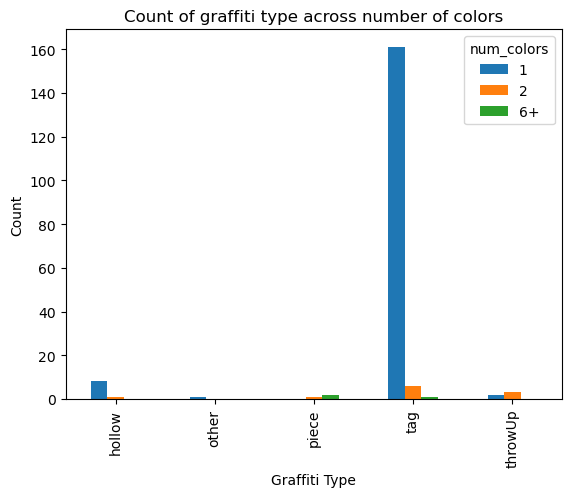

In [181]:
summary4.plot.bar(title = 'Count of graffiti type across number of colors', xlabel = 'Graffiti Type', ylabel = 'Count');

***I choose to study this combination because I hypothesize that writers will use more color for more intricate graffiti. The table shows that tags and hollow, quicker and simpler graffiti types are written with fewer colors. Whereas throwup and especially pieces, more color was dedicated to them.***

In [182]:
# Table summarizing number of colors of each graffiti message
summary5 = pd.crosstab(my_graf['message'], my_graf['num_colors'])

In [183]:
summary5

num_colors,1,2,6+
message,,,
other,3,0,0
political,2,0,0
sexual,4,1,0
social,6,1,0
writter,106,5,2


***I am curious to see how number of colors is chosen to express the complexity of the graffiti message. It seems like number of color may not be an important factor in the delivery of message for the majority of the graffiti.***

### 4. Produce at least three summaries tables of the following column combinations: 

In [184]:
# Tranforms data from string to list
combination['surveillance'] = combination['surveillance'].apply(literal_eval).reset_index(drop = True)

In [185]:
# Create a row for each item in the transformed list
combination = combination.explode(column = ['surveillance'])

In [186]:
# Table summarizing the number of surveillance type of each graffiti type
summary6 = pd.crosstab(combination['surveillance'], combination['type'])

In [187]:
summary6

type,hollow,other,piece,tag,throwUp
surveillance,,,,,
alarms,1,0,0,7,0
cameras,2,1,2,116,0
dogs,2,0,1,32,0
guards,2,0,0,46,0
lights,5,1,2,142,1
people,6,1,3,160,1


***Surveillance is particularly dense in my group block (International District), so I want to see what type of surveillance would have the highest deterring effect on each type of graffiti. Based on the table, alarms are the best deterrent against graffiti. The table also suggests the presence of people and recognition may not be a good deterrence due to them further encouraging writers.***

In [188]:
# Tabel summarizing number of viewing potential type of each graffiti type
summary7 = pd.crosstab(combination['viewing_potential'], combination['type'])

In [189]:
summary7

type,hollow,other,piece,tag,throwUp
viewing_potential,,,,,
high,4,3,4,268,2
low,12,0,0,107,4
medium,5,0,4,136,0


***In theory, the viewing potential of canvas plays a major role in whether writers would write on it. I want to see if our data supports this notion. The table replicates the trend of writers aiming for canvases with higher viewing potential for fame and recognition. However, it is also worth pointing out that pieces tend to be located in  difficult spotting areas due to their complexity and time consumption. Our block group has several pieces at challenging locations for us to collect data, resulting in them not being recorded. Knowing this will make a better evaluation of the complexity of graffiti and prevent the inaccurate conclusion that our block group strictly follows the first trend.***

In [190]:
# Table summarizing number of property type of each graffiti message
summary8 = pd.crosstab(combination['property_type'], combination['message'])
summary8

message,other,political,sexual,social,writter
property_type,,,,,
comercial,4,7,0,7,117
government,0,0,13,0,74
public,3,0,8,14,110
residential,2,0,0,0,21


***This combination is pretty random for me, and I just want to see if anything is interesting. The result suggests that most of the graffiti is for personal interest, with the majority of the message being for the writer with relatively no discrimination against commercial or public property type. Government properties  have a bit less compared to the other two, maybe due to higher surveillance accompanying them. Residential properties are more respected than the others but still couldn't fully avoid graffiti. With a relatively high perception of violence and unorderedness of our block group, this could explain why residential properties are  being targeted much more than the expectation.***

### 5. Produce two stacked bar charts for any of the combinations above.

In [191]:
# Import data visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
# Cleanup dataset
combination = combination.reset_index(drop=True)

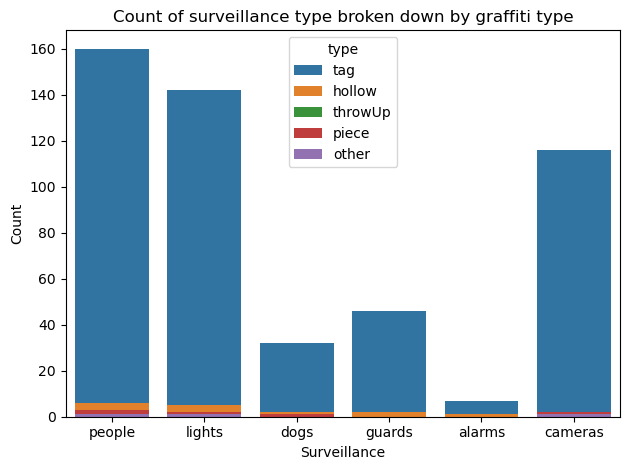

In [193]:
# Plotting Count of surveillance type broken down by graffiti type
# Construct the plot
sns.countplot(data = combination, x = 'surveillance', hue = 'type',  dodge = False)
# Title plot and axis
plt.title("Count of surveillance type broken down by graffiti type")
plt.xlabel("Surveillance")
plt.ylabel("Count")
# Show the plot
plt.tight_layout()
plt.show()

**The comparison shows that tags thrive under almost all surveillance types besides alarms while other types are extremely suppressed. Additionally, only 2 types of graffiti (tag and hollow) exist when there is a presence of guards and alarm. Interestingly, the presence of light and people may seem to benefit writers, instead of detering.**

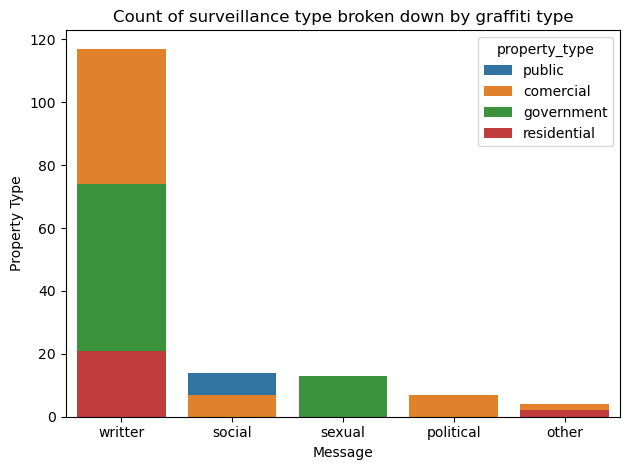

In [194]:
# Plotting number of message for each property type of canva
# Construct the plot
sns.countplot(data = combination, x = 'message', hue = 'property_type',  dodge = False)
# Title plot and axis
plt.title("Count of surveillance type broken down by graffiti type")
plt.xlabel("Message")
plt.ylabel("Property Type")
# Show the plot
plt.tight_layout()
plt.show()

**It's interesting to see that political message only spawned on comercial properties, as I would expect writers to be more inclined to express their messages directly onto government properties. Message for writers is the most popular among all property type. Low count of residential property usage as canvas shows that the unwritten rule of not writing on residencial property still have some effect.**

# Final Milestone

### Explorations

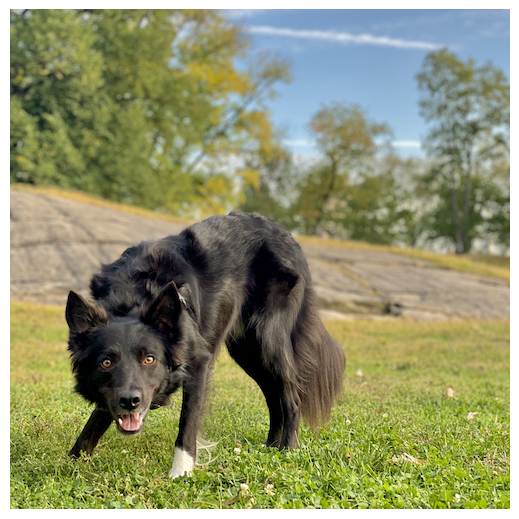

In [195]:
sns.dogplot()

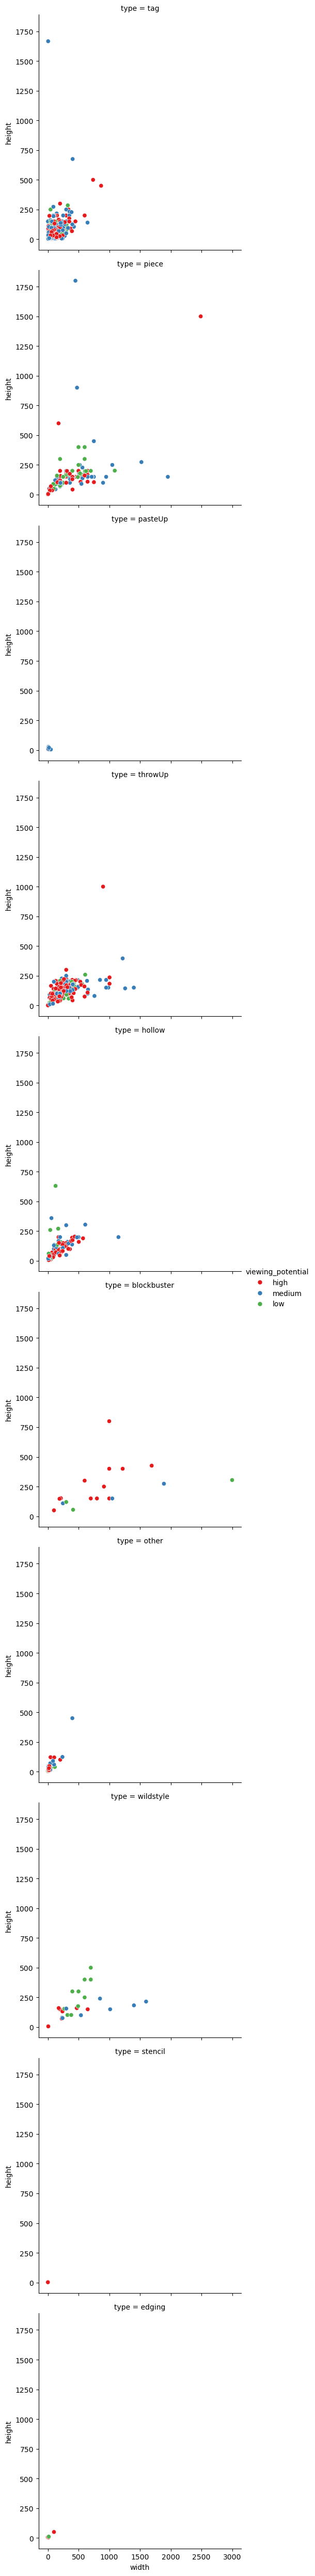

In [196]:
# Scatter plots comparing size distribution of graffiti type based on viewing potential
sns.relplot(
    data = all_combination, 
                x = 'width', 
                y = 'height',
                sizes = (30, 100),
                palette = 'Set1',
                row = 'type',
                hue = 'viewing_potential'
);

**This combination of dimension and choice of the graph allows me to see the spread of size of the graffiti between different type and viewing potential. Knowing the pattern of their size allows us to make predictions based on their type and viewing potential, and vice versa.**

**We can see that there is not a lot of variation in tag and viewing potential for size. Pieces follow a funnel-shaped spread, where high view potential tends to be smaller in size and more clustered than medium and low potential. Throwup is similar to tag, which mostly has sizes that are similar together, with the width being slightly more varied. No significant difference between viewing potential. Hollow is a mini version of the piece. Blockbusters are more spread out and dominated with high view potential. For wildstyle, low view potential tends to be higher whereas medium view potential is slightly wider. The rest of the graffiti type does not have enough data to make a reasonable observation.**

### Location

In [197]:
# Help calling these columns 
keep_canvas = ['id', 'coords']
keep_graffiti = ['canvas_id', 'type']

In [198]:
# Tranforming data from string to list and to deal with missing data
from ast import literal_eval
from numpy import nan
def extract(row, key):
    '''Return empty value with nan and return non empty value as float'''
    dct = literal_eval(row)
    value = dct[key]
    if value =='':
        value = nan
        return
    else:
        return float(value)

In [199]:
df = (my_can.loc[:,keep_canvas]
            .assign(lat= canvas.coords.apply(extract, key='latitude'))  #apply function and create a column with latitude
            .assign(long=canvas.coords.apply(extract, key='longitude')) #apply function and create a column with latitude
            .dropna(subset=['lat', 'long']) # remove anyrow entries with no lat or long
            .merge(my_graf.loc[:,keep_graffiti], left_on='id', right_on='canvas_id', how='inner') # Merge with my graffiti table
)

In [200]:
# Import tools for mapping features
import folium
from folium.plugins import MarkerCluster

In [201]:
# Approximately the center of my block
center_lat, center_lon = 47.600440, -122.326490

In [202]:
# Creating an interactive feature
fmap = folium.Map(
    location = [center_lat, center_lon],               # coordinates on where to center your map
    zoom_start= 13,              # zoom level. Higher the number the closer you are
    width='100%',
    min_zoom = 10,
    control_scale = True,
    max_bounds = True,         # keep within the bounds defined below
    min_lat = 47.5850,
    max_lat = 47.6150,
    min_lon = -122.3330,
    max_lon = -122.3150,
    );

In [203]:
# Marking feature on the created map, indicating our my block's graffiti
marker_cluster = MarkerCluster(name = 'graffiti').add_to(fmap)

In [204]:
for indx, row in df.iterrows():
    # create marker
    folium.Marker(location = [row.lat, row.long],               # location of each graffiti
                  popup = row.type,               # create an icon
                  icon = folium.Icon(color = 'red', icon = 'pencil') # identify the popup with each type
                  ).add_to(marker_cluster)

In [205]:
fmap

### Focus questions

#### 1. How does surveillance influence count and complexity of graffiti? Are people and light fit into surveillance catergory?

**I investigate this question because the distribution of count of graffiti based on number of surveillance seem odd for my block in comparision to the other blocks trend. Plus I know recognition and fame are what writers aiming for so it seems counter intuitive for them to write at places with no people.**

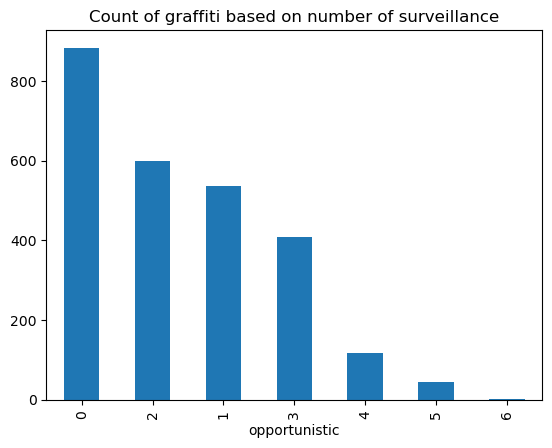

In [206]:
# Other blocks
# Tranform data from string to list
res_combined['surveillance'] = res_combined.loc[:, 'surveillance'].apply(literal_eval)
# Find the total number of surveillance for each observation
res_combined['opportunistic'] = res_combined['surveillance'].apply(count_surveillance)
# Plot the distribution of count of graffiti based on their number of surveillance
res_combined.opportunistic.value_counts().plot.bar(title = 'Count of graffiti based on number of surveillance');

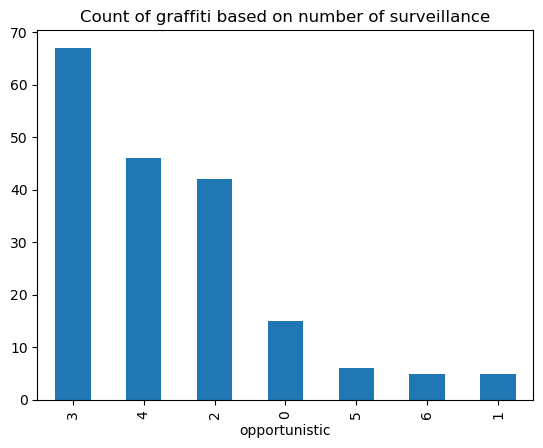

In [207]:
# My block
combined['surveillance'] = combined.loc[:, 'surveillance'].apply(literal_eval) # Tranform data from string to list
combined['opportunistic'] = combined.loc[:, 'surveillance'].apply(count_surveillance) # Count items in each list
combined.opportunistic.value_counts().plot.bar(title = 'Count of graffiti based on number of surveillance');

**From the table, either 0, 5, 6, 1 comprised of surveillance type that are actually effective, their combination is effective, or they lack the surveillance type that induce graffiti writing. The inducive surveillance type that I have previously hypothesized are people, light, camera.**

In [208]:
# My block
st1 = pd.crosstab(combined['opportunistic'], combined['type'])
st1.loc[:, 'Total'] = st1.sum(axis=1)
st1

type,hollow,other,piece,tag,throwUp,Total
opportunistic,,,,,,
0,3,0,0,8,4,15
1,0,0,0,5,0,5
2,3,0,2,36,1,42
3,2,1,0,64,0,67
4,0,0,1,45,0,46
5,0,0,0,6,0,6
6,1,0,0,4,0,5


**In term of complexity, 2 surveillance seems abnormal. This combination has the highest number complex graffiti, even more than 3, which has the highest total graffiti counts.**

In [209]:
# This function helps aggregating data appear differently but are actually the same
def sort_list(list):
    '''sort items in a list alphabetically'''
    return tuple(sorted(list))
# Sort items in list for aggregation when graphing
combined['surveillance'] = combined.loc[:, 'surveillance'].apply(sort_list)

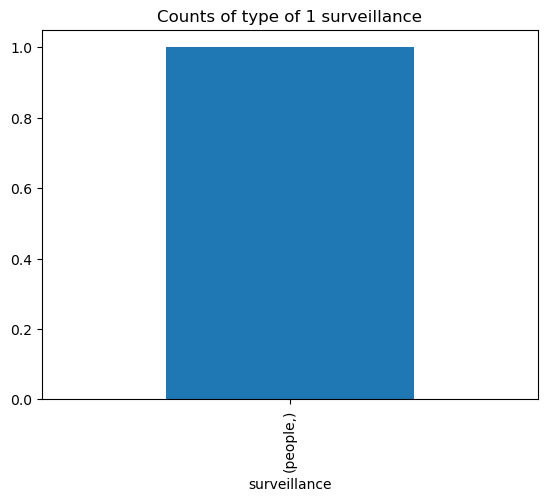

In [210]:
combined[combined['opportunistic'] == 1]['surveillance'].value_counts(normalize = True).plot.bar(title = 'Counts of type of 1 surveillance');

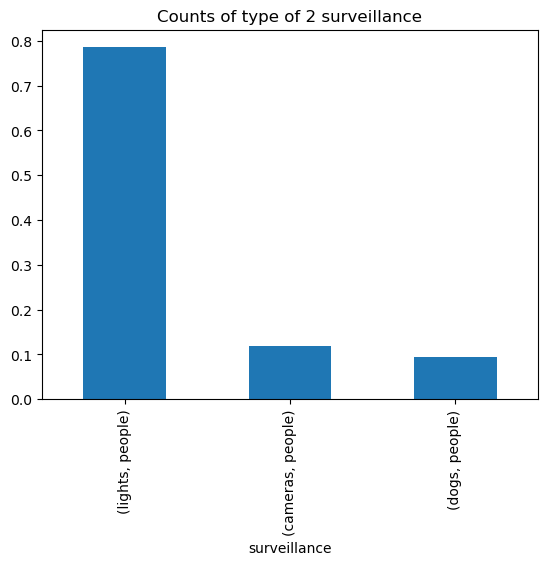

In [211]:
combined[combined['opportunistic'] == 2]['surveillance'].value_counts(normalize = True).plot.bar(title = 'Counts of type of 2 surveillance');

**People and light combination is the majority of the 2 surveillance type distribution may suggest that presence of people and light should not be classified as surveillance. I believe they should be classified as catalysts or facilitation for graffiti writing, because when comparing to 0 or 1 surveillance type, 2 surveillance type clearly has higher count of graffiti.**

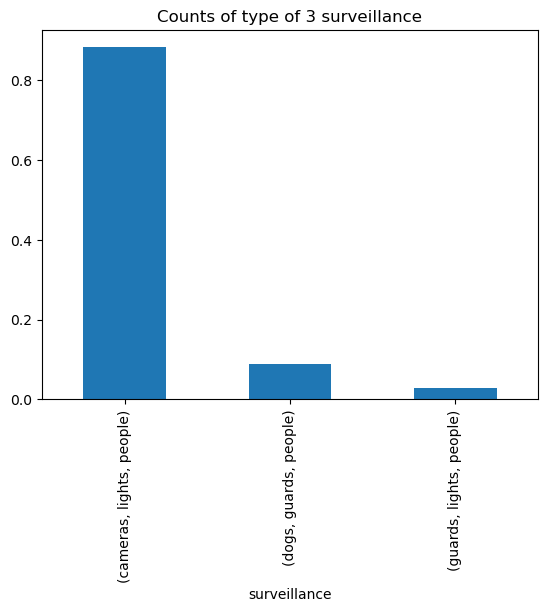

In [212]:
combined[combined['opportunistic'] == 3]['surveillance'].value_counts(normalize = True).plot.bar(title = 'Counts of type of 3 surveillance');

**Again, people and light dominates the proportion, but the lesser effect when comparing to 2 surveillance type maybe due to presence of camera. A strong drop when people and light accompanied by dogs or guards.**

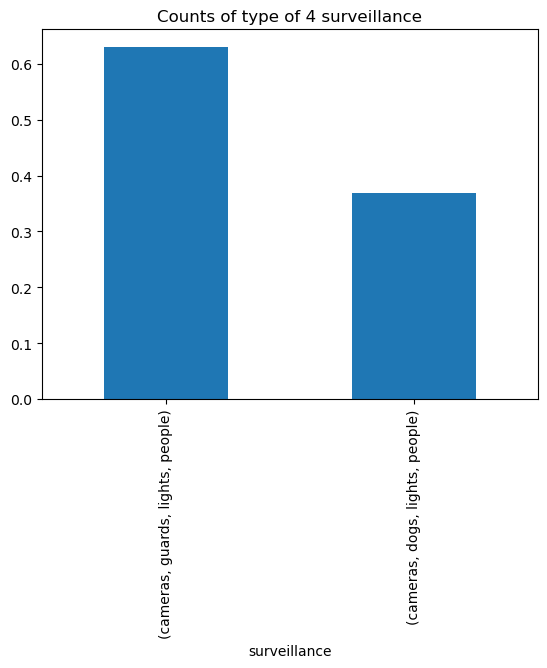

In [213]:
combined[combined['opportunistic'] == 4]['surveillance'].value_counts(normalize = True).plot.bar(title = 'Counts of type of 4 surveillance');

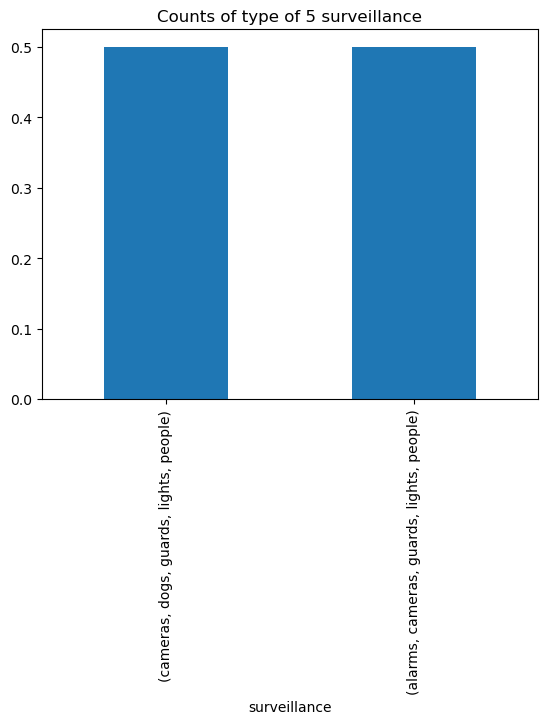

In [214]:
combined[combined['opportunistic'] == 5]['surveillance'].value_counts(normalize = True).plot.bar(title = 'Counts of type of 5 surveillance');

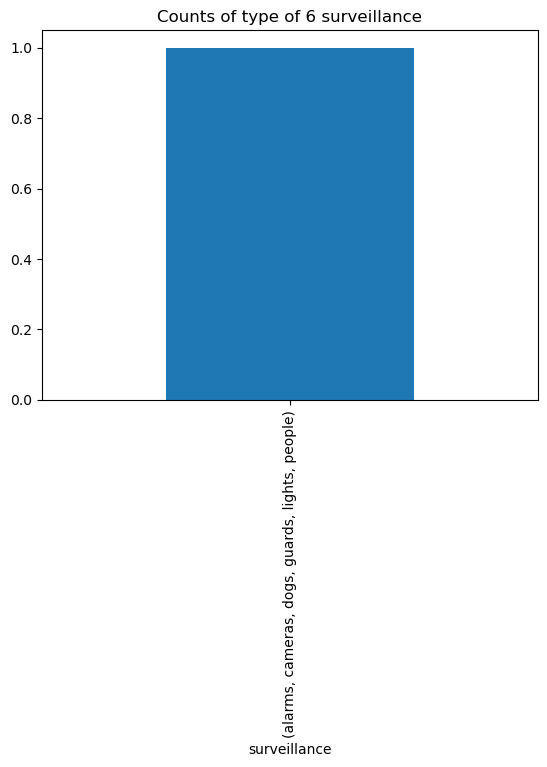

In [215]:
combined[combined['opportunistic'] == 6]['surveillance'].value_counts(normalize = True).plot.bar(title = 'Counts of type of 6 surveillance');

**Based on the surveillance combination profile and the number of graffiti with each surveillance combination, we can draw the following conclusions/observations about my block. Having less than 2 surveillance and lacking both people and light, there is only a small amount of graffiti and the complexity of the graffiti is only limited to tags with a few hollows (I recorded these hollows personally so I remembered that they were in a very limited access area so this maybe cause some bias in interpretation). Having more than 4 surveillance also shows decreasing of graffiti and their complexity. The sweet spot is between 2 to 4 where there is a good amount of graffiti and their complexity varying with the profile of surveillance combination. Higher count of graffiti where there is guard or dog, but less intricate than when their is only people, light, and camera. My takeaway from this is that people and light support and encourage graffiti activity(comparing to the controlled 0 and 1). Adding one more surveillance sprinkle a bit of thrill for writers, so they shift from intricacy to quicker graffiti types. More than 2 begins to significantly deter graffiti.**

#### 2. How much conflict exists between Seattle graffiti writers?

**I think this question will be very cool to know the answer.**

In [245]:
# List containing some synonym to beef
keywords = [
    'fight', 'beef', 'battle', 'war', 'disrespect', 'clashing', 'domination', 'revenge',
    'retaliation', 'overwrite', 'invasion', 'defacement', 'graffiti war', 'cross-out', 'scratching', 
    'reclaiming', 'destroy', 'territorial', 'mad', 'anger', 'written over', 'cover up'
    'animosity', 'sabotage', 'ripping', 'war', 'conflict', 'streaking', 'overlapping', 'diss', 'over',
    'dissing', 'confrontation', 'feud', 'blasting', 
    'rivalry', 'blocked', 'biting', 'warzone', 'shadowing', 'defend', 
    'destroys', 'reclaim', 'disappearance', 'writeover', 'scrub', 'squashing', 'squash', 
    'exterminate', 'smash', 'erase', 'slashing', 'spamming', 'retribution', 'scaling', 
    'intercepting', 'undercutting', 'burn', 'undermine', 'slap', 'displacement', 'blockout', 'backlash', 
    'blackout', 'rival', 'sabotaged', 'conquer', 'turf', 'repel', 'countertag', 'outdo', 'outsell', 
    'trashing', 'jamming', 'out-tag', 'abandon', 'creeping', 'bump', 'delete', 
    'overpower', 'busting', 'rework', 'stomp', 'deface', 'cover', 'patch', 'diss', 
    'subvert', 'shutting down', 'takeover', 'obliterate', 'overriding', 'vandal', 'banger', 
    'grime', 'cripple', 'unseat', 'smear', 'scrap', 'shut down', 'take down', 'override', 'outdo', 'clash', 'counter', 'clipped', 'dump', 'smudge'
]

In [240]:
# This function is used for more complex searching
#def beef_radar(data, keywords):
#    '''Return 1 if string contain words from vocab list and 0 if no'''
    #result = []  # Store results for all notes
    #for note in data:
        #if isinstance(note, str):  # Check if the note is a string
            #indicator = 0  # Default indicator
            #for word in note.split():  # Split the note into words
                #if word.lower() in keywords:  # Case-insensitive keyword match
                    #indicator = 1
                    #break  # If any keyword is found, exit the loop
            #result.append(indicator)  # Add result for this note
        #else:
            #result.append(0)  # If the note is not a string, append 0
    #return result

In [241]:
# Set the searching condition as "or"
pattern = "|".join(keywords)

In [242]:
# Check beefiness of other blocks
res_combined['beefiness'] = res_combined.notes_g.str.contains(pattern, case=False, na=False)
res_combined[res_combined['beefiness'] == 1].notes_g.head(50)

4      White tag over political ACAB tag. Possibly CL...
5                                CLDEM tagged over CEMIR
21                  Lots of things covering over the tag
22     Written over another tag, maybe conflict or ma...
98                    This tag is all over the building.
149    No conflicts that I can see. There isn’t any t...
150                 Sticker might be covering one letter
178                                 Over buffed graffiti
196                   KOVET has tags all over this area.
197    Done over another throw up, very deliberate. P...
201             This tag is written over by another tag.
202    The top of this tag is written over by another...
203    This tag writes directly over other tags “SOS”...
205         an image tag directly overlaps with this tag
206    This tag writes over two tags “WOKONE! ZOOB4!”...
210                        There is a halo over this tag
213    another tag(“SURENO G’s”) goes directly over t...
214        This tag directly go

In [243]:
res_combined['beefiness'].value_counts()

beefiness
False    2223
True      369
Name: count, dtype: int64

In [244]:
# Check beefiness of other blocks in percentage
res_combined['beefiness'].value_counts(normalize = True) 

beefiness
False    0.857639
True     0.142361
Name: proportion, dtype: float64

In [221]:
# Percentage of none as input for notes
res_combined.notes_g.isnull().value_counts(normalize = True)

notes_g
True     0.643904
False    0.356096
Name: proportion, dtype: float64

**I think almost 15% of potential conflict is pretty high. Although the comprehensiveness of the keyword list and the search method are still limited and unable to identify with absolute certainty, having almost 65% of no response indicates that there is potential for more similar cases, balancing out the error.**

In [222]:
# Check beefiness of my block
combined['beefiness'] = combined.notes_g.str.contains(pattern, case=False, na=False)
combined['beefiness'].value_counts()

beefiness
False    170
True      16
Name: count, dtype: int64

In [223]:
# Check beefiness of other blocks in percentage
combined['beefiness'].value_counts(normalize = True)

beefiness
False    0.913978
True     0.086022
Name: proportion, dtype: float64

In [224]:
# Calculating percentage of my group block's conflict.
16/ (16+369) * 100

4.1558441558441555

**Given the nature of International District, I didn't expect my block to have less conflict relative to other blocks (accounts for 4% of total cases).**

In [233]:
# Plotting conflict location on a map
# Help calling these columns 
keep_canvas1 = ['id', 'coords']
keep_graffiti1 = ['canvas_id', 'type', 'notes']

df1 = (canvas.loc[:,keep_canvas1]
            .assign(lat= canvas.coords.apply(extract, key='latitude'))  #apply function and create a column with latitude
            .assign(long=canvas.coords.apply(extract, key='longitude')) #apply function and create a column with latitude
            .dropna(subset=['lat', 'long']) # remove anyrow entries with no lat or long
            .merge(graffiti.loc[:,keep_graffiti1], left_on='id', right_on='canvas_id', how='inner') # Merge with my graffiti table
)

df1['beefiness'] = df1.notes.str.contains(pattern, case=False, na=False)

center_lat, center_lon = 47.645, -122.334

fmap1 = folium.Map(
    location = [center_lat, center_lon],               # coordinates on where to center your map
    zoom_start= 13,              # zoom level. Higher the number the closer you are
    width='100%',
    min_zoom = 10,
    control_scale = True,
    max_bounds = True,         # keep within the bounds defined below
    min_lat = 47.4960,
    max_lat = 47.8000,
    min_lon = -122.4376,
    max_lon = -122.2196
    );

marker_cluster1 = MarkerCluster(name = 'graffiti').add_to(fmap1)
for indx, row in df1.iterrows():
    if row['beefiness'] == 1:
    # create marker
        folium.Marker(location = [row.lat, row.long],               # location of each graffiti
                  popup = row.type,               # create an icon
                  icon = folium.Icon(color = 'red', icon = 'pencil') # identify the popup with each type
                  ).add_to(marker_cluster1)

In [234]:
fmap1

**The map shows that most conflicts were found south of UW campus, and one hotspot in the Wallingford area. Turns out, the International District is  giant spot of conflict, but my block is relatively nicer. Most of the smaller clusters are located near a freeway or water body. There appear to be more conflicts in the southern areas, which may be linked to the socio-economic challenges they faces, including higher crime rates, a visible homeless population, and a more complicated cultural population.**

### Final takeaways

**My group block closely follows the general trends observed in the rest of the class, with a few notable exceptions.**

**First, the number of graffiti varies significantly with the complexity of surveillance. The optimal conditions for graffiti writers, offering both thrill and visibility, occur when 2-3 types of surveillance are in place. This range significantly increases the number of graffiti instances. However, the presence of alarms drastically reduces graffiti activity.**

**Second, my block is decently peaceful, at least within the International District, with only 4% of total conflict cases originating from this area.**

**It is important to note that some of the observations and conclusions may be biased. Certain types of graffiti tend to cluster together, which increases their likelihood of being recorded. In contrast, other graffiti are located in isolated areas or obscured by barriers, which may have led to their exclusion from the data. Additionally, the methods used in this analysis have limitations in terms of their interpretive power.**

# Improvement
## Milestone 1
1. Switched to cross tab table for Basic Summaries
2. Improved Report Quality
## Milestone 2
1. Added chart for Graffiti Combination (line 110)
2. Switched to stacked barchart for Column Combinations (line 122 and line 123)
3. Added title and labels to charts